In [2]:
import chess.pgn
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("machine_part.csv")

## Гипотеза 2.

Проверим гипотезу о том, что cреднестатистический игрок, имея больше времени, играет лучше, чем имея меньше времени. Запишем это формально:

$$ H_0: \mu_2 = \mu_3 $$

$$ H_1: \mu_2 \neq \mu_3 $$, 

где $\mu_2$ - математическое ожидание оценки хода в миттеншпиле (времени много), $\mu_3$ - математическое ожидание оценки хода в 
ндшпиле (времени мало). **Для проверки гипотезы возьмем партию с относительно маленьким контролем времени - 5 минут (300 секунд)**

**Также будем проверять гипотезу с уровнем доверия 0.99**

In [53]:
from scipy.stats import ttest_ind
condition = df["seconds"] == 300
df_hyp = df[condition]
## Используем t-test:
t_statistic, p_value = ttest_ind(df_hyp['eval_std2'], df_hyp['eval_std3'], equal_var=False)
if p_value <= 0.01:
    print("Есть основания отвергать гипотезу H0")
    print("p-значение:", p_value)
else:
    print("Нет оснований отвергать гипотезу H0")
    print("p-значение:", p_value)

Есть основания отвергать гипотезу H0
p-значение: 3.670482286585841e-72


**Вывод:** Как мы можем заметить, p-значение очень маленькое. Следовательно, можно уверенно утверждать, что имея больше времени, среднестатистический игрок играет лучше. 

In [55]:
df.head()

,Unnamed: 0,game_id,termination,result_coded,skill_cat,seconds,eco_cat,0,eval_std1,eval_std2,eval_std3,loss1,loss2,loss3,mean_eval,vremya1,vremya2,vremya3
0,0,c17b10c9-84c5-4c85-8c3b-b7866d0e25de,Time forfeit,w,2,300,A,13,22.360680,34.355980,43.091956,0.000000,0.000000,0.750000,15.538462,4.929503,6.849574,16.580611
1,1,63fbeb77-cbcf-4e0a-ba24-a9fcce5c5c4f,Time forfeit,w,3,600,C,67,207.761854,468.703935,345.992368,1.043478,2.409091,7.727273,73.910448,42.935285,67.584499,101.161790
2,2,6c678d21-9c2c-47cc-acc8-e4d4be1aeb51,Normal,b,4,600,B,34,20.529912,391.709911,807.592348,0.500000,3.272727,12.181818,27.735294,12.007573,30.279606,29.550881
3,3,77346e14-a662-424c-94f0-37330765c1d0,Normal,w,2,600,C,37,45.041434,24.756389,765.173356,1.153846,3.750000,8.416667,21.702703,12.552454,17.417120,24.892953
4,4,ad728a3a-85df-4727-a596-e0c5e56b5f8e,Normal,b,1,480,C,30,222.130717,276.295816,1057.605030,0.200000,3.000000,6.000000,39.233333,8.030497,16.321765,59.676908


In [72]:
df

,Unnamed: 0,game_id,termination,result_coded,skill_cat,seconds,eco_cat,0,eval_std1,eval_std2,eval_std3,loss1,loss2,loss3,mean_eval,vremya1,vremya2,vremya3
0,0,c17b10c9-84c5-4c85-8c3b-b7866d0e25de,Time forfeit,w,2,300,A,13,22.360680,34.355980,43.091956,0.000000,0.000000,0.750000,15.538462,4.929503,6.849574,16.580611
1,1,63fbeb77-cbcf-4e0a-ba24-a9fcce5c5c4f,Time forfeit,w,3,600,C,67,207.761854,468.703935,345.992368,1.043478,2.409091,7.727273,73.910448,42.935285,67.584499,101.161790
2,2,6c678d21-9c2c-47cc-acc8-e4d4be1aeb51,Normal,b,4,600,B,34,20.529912,391.709911,807.592348,0.500000,3.272727,12.181818,27.735294,12.007573,30.279606,29.550881
3,3,77346e14-a662-424c-94f0-37330765c1d0,Normal,w,2,600,C,37,45.041434,24.756389,765.173356,1.153846,3.750000,8.416667,21.702703,12.552454,17.417120,24.892953
4,4,ad728a3a-85df-4727-a596-e0c5e56b5f8e,Normal,b,1,480,C,30,222.130717,276.295816,1057.605030,0.200000,3.000000,6.000000,39.233333,8.030497,16.321765,59.676908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11162,11162,88fe5116-b0cf-4d8f-b89c-c6fb9b61378c,Time forfeit,b,2,600,A,154,379.790789,164.807291,2673.608038,9.076923,25.078431,30.803922,158.110390,80.407447,125.989919,100.865319
11163,11163,44edc5ba-f305-4b04-888d-3779ce1143e3,Normal,w,2,600,C,40,32.876058,61.517144,610.726092,0.000000,1.692308,7.692308,24.900000,2.038099,5.470199,47.952033
11164,11164,0feb56f1-1bd0-470f-b09b-cf5e21c79681,Normal,b,1,600,C,80,90.840159,129.726339,482.801988,2.555556,14.333333,20.153846,22.862500,49.273728,85.346220,86.367266
11165,11165,6e83d932-7c52-4283-b9a4-1581fc8c9709,Normal,b,2,600,D,139,135.745282,677.635950,786.425836,5.361702,20.739130,26.152174,47.863309,77.225842,94.179734,29.154138


## Гипотеза 3.

Проверим гипотезу о том, что белые выигрывают с такой же частотой, что и чёрные. Запишем это формально: 

$$ H_0: \mu_w = \mu_b $$

$$ H_1: \mu_w \neq \mu_b $$, 

где $\mu_w$ - математическое ожидание вероятности победы белых, $\mu_b$ - чёрных.

In [69]:
from statsmodels.stats.proportion import proportions_ztest

# Подсчитываем количество побед белых и черных
white_wins = df[df['result_coded'] == 'w']['result_coded'].count()
black_wins = df[df['result_coded'] == 'b']['result_coded'].count()

total_games = df['result_coded'].count()

count = np.array([white_wins, black_wins])
nobs = np.array([total_games, total_games])
stat, p_value = proportions_ztest(count, nobs)

print('p-значение:', p_value)


p-значение: 0.009797970077964336


**Вывод:** можно заметить, что на уровне значимости 0.1, 0.05 есть основания отвергнуть гипотезу H0. Однако, стоит заметить, что с уровнем значимости 0.01 необходимо быть аккуратным, так как p-value стремится к этому значению.

Давайте реализуем этот же тест, но используя метод наивного бутстрапа.

In [76]:
df["result"] = df["result_coded"].apply(lambda x: 1 if x == "w" else 0)

0.48222441121160564 0.5006716217426346


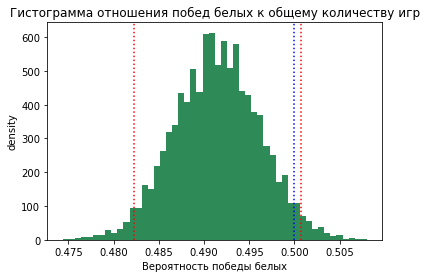

In [112]:
import matplotlib.pyplot as plt
np.random.seed(2004)

n_iter = 10000
confidence = 95
ratios = 0
obs = 0.5

bootstraps = []
for i in range(n_iter):
    bootstrap = np.random.choice(df["result"], size = len(df["result"]))
    bootstrap_mean = np.mean(bootstrap)
    bootstraps.append(bootstrap_mean)

b_left = np.percentile(bootstraps, (100 - confidence)/2)
b_right = np.percentile(bootstraps, (100 + confidence)/2)
print(b_left, b_right)
plt.hist(bootstraps, bins = 50, color = "seagreen")
plt.axvline(x = 0.5, color = "blue", linestyle = ":")
plt.axvline(x = b_left, color = "red", linestyle = ":")
plt.axvline(x = b_right, color = "red", linestyle = ":")
plt.title("Гистограмма отношения побед белых к общему количеству игр")  
plt.xlabel("Вероятность победы белых")  
plt.ylabel("density")
None

Вывод: на уровне значимости 95% нет оснований отвергать гипотезу H0 о том, что белые выигрывают с такой же частотой, что и чёрные.